# Aproximação de derivadas por diferenças finitas

A técnica de diferenciações finitas consiste em aproximar a derivada de uma função via uma fórmula discreta, que precisam apenas de pares ordenados $\{(x_i, y_i)\}_{i=1}^{n}$, onde é canônico se denotar $y_i = f(x_i)$. Essas formulas podem ser demonstradas de divérsas maneiras, desde o método de René Descartes, Isaac Barrow, ou de Fermat, mas a forma mais comum é através do cálculo diferencial [1]. Primeiro precisamos da definição de derivada: 

$$f'(x_0) = \lim_{h \rightarrow 0}\frac{f(x_0 + h) - f(x_0)}{h},$$

neste limite, com a restrição $h \ne 0$, mas tão pequeno quanto se possa imaginar, é esperado que seja uma aproximação razoável para $f'(x_0)$.

Dito isso existem três formas de implementar as diferenças finitas. A **diferença finita progressiva de primeira ordem**: 

$$D_{+h} f(x_0) := \frac{f(x_0 +h) - f(x_0)}{h} \approx f'(x_0)$$

é uma das possíveis aproximações de $f'(x_0)$. A outra forma é chamada de **diferença finita regressiva**, que pode ser obtida através de séries de Taylor de $f(x)$ em torno de $(x_0 - h)$:

$$D_{-h} f(x_0) := \frac{f(x_0) - f(x_0 - h)}{h} \approx f'(x_0)$$.

Lembrando que ambas diferenças finitas progressivas ou regressivas, tem um erro de truncamento de ordem $h$.

A ultima forma levando em conta este método de se obter $f'$ de forma numérica, é por **diferença finita central**, que leva em conta as diferenças prgressivas e regressivas. Suponha a expanção em séries de Taylor:

$$f(x_0 + h ) = f(x_0) + h f'(x_0) + h^{2}\frac{f''(x_0)}{2!} + h^{3}\frac{f'''(\varepsilon_{+})}{3!} + ...$$

$$f(x_0 - h ) = f(x_0) - h f'(x_0) + h^{2}\frac{f''(x_0)}{2!} - h^{3}\frac{f'''(\varepsilon_{-})}{3!} + ...$$

Subtraindo a segunda equação da primeira teremos:

$$f(x_0 + h ) - f(x_0 -h) = 2hf'(x_0) + h^{3}\Big(\frac{f'''(\varepsilon_{+} - \varepsilon_{-})}{3!}{}\Big)$$

Ao dividir a equação acima por $2h$ e isolar $f'(x_0)$ temos outra forma de obter a diferença finita $f'$ de uma função $f$. Assim, a **diferença finita central** é dada por:

$$D_{0,h} f(x_0) := \frac{f(x_0 + h) - f(x_0 - h)}{2h} \approx f'(x_0)$$,

um ponto importante é que diferente das outras duas diferenças que tem erro de trumcamento na ordem de $h$, a diferença finita central tem um erro de truncamento em ordem $h^{2}$. Por este faço podemos afirmar que a precisão deste método é maior.

# Implementando as tecnicas de diferenciação

In [1]:
def diff_progressiva(f, x, h=0.001):
    """
    Esta função implementa a diferenciação 
    finita progressiva de ordem 1.
    
    :param f: função a ser diferenciada
    :param x: variável a ser diferenciada
    :param h: passo
    :return diff_f: resultado da derivação no ponto x
    """
    diff_f = (f(x + h) - f(x)) / h
    return diff_f


def diff_regressiva(f, x, h=0.001):
    """
    Esta função implementa a diferenciação 
    finita regressiva de ordem 1.
    
    :param f: função a ser diferenciada
    :param x: variável a ser diferenciada
    :param h: passo
    :return diff_f: resultado da derivação no ponto x
    """
    diff_f = (f(x) - f(x - h)) / h
    return diff_f



def diff_central(f, x, h=0.001):
    """
    Esta função implementa a diferenciação 
    finita central de ordem 1.
    
    :param f: função a ser diferenciada
    :param x: variável a ser diferenciada
    :param h: passo
    :return diff_f: resultado da derivação no ponto x
    """
    diff_f = (f(x + h) - f(x - h)) / (2*h)
    return diff_f


# Aplicando as diferenciações finitas

In [2]:
import numpy as np
from matplotlib import pyplot as plt 

Estou importando dois modulos,`matplotlib` para visualização, `numpy` para obter funções seno, cosseno e exponencial.

In [14]:
# Definindo funções para serem derivadas

seno = lambda x : np.sin(x)
cosseno = lambda x : np.cos(x)
exponencial = lambda x : np.exp(x)
log_e = lambda x : np.log(x)
funcao_segunda_ordem = lambda x : x**2 - x

# range de pontos onde as funções serão diferenciadas
variaveis_x = np.linspace(-10, 10, 100)

## Aplicando diferenciações na função $f(x) = sen(x)$



In [15]:
y_progr = diff_progressiva(seno, variaveis_x)
y_regre = diff_regressiva(seno, variaveis_x)
y_centr = diff_central(seno, variaveis_x)

Visualizando as diferenciações

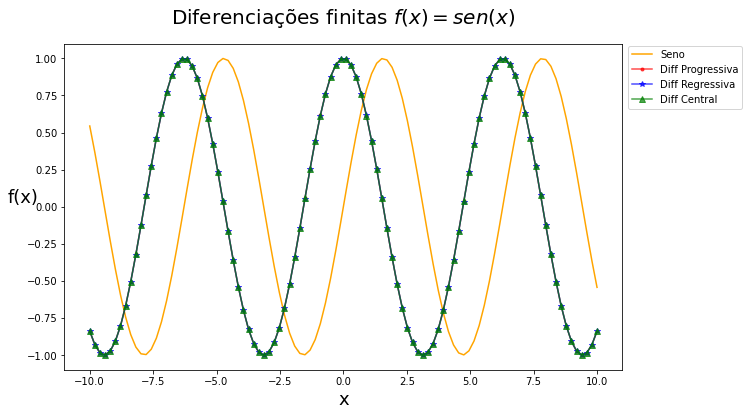

In [16]:
plt.figure(figsize=(10,6))
plt.plot(variaveis_x, seno(variaveis_x), label='Seno', c='Orange')
plt.plot(variaveis_x, y_progr, label='Diff Progressiva', c='Red', marker='.', alpha=0.7)
plt.plot(variaveis_x, y_regre, label='Diff Regressiva', c='Blue',marker='*',alpha=0.7)
plt.plot(variaveis_x, y_centr, label='Diff Central', c='Green',marker='^', alpha=0.7)
plt.legend(loc=(1.01,0.8))
plt.title(r'Diferenciações finitas $f(x) = sen(x)$', fontsize=20,pad=20)
plt.xlabel(r'x', fontsize=18)
plt.ylabel(r'f(x)', fontsize=18, rotation=0)
plt.show()

### Comentários sobre a diferenciação

## Aplicando diferenciações na função $f(x) = cos(x)$



In [17]:
y_progr = diff_progressiva(cosseno, variaveis_x)
y_regre = diff_regressiva(cosseno, variaveis_x)
y_centr = diff_central(cosseno, variaveis_x)


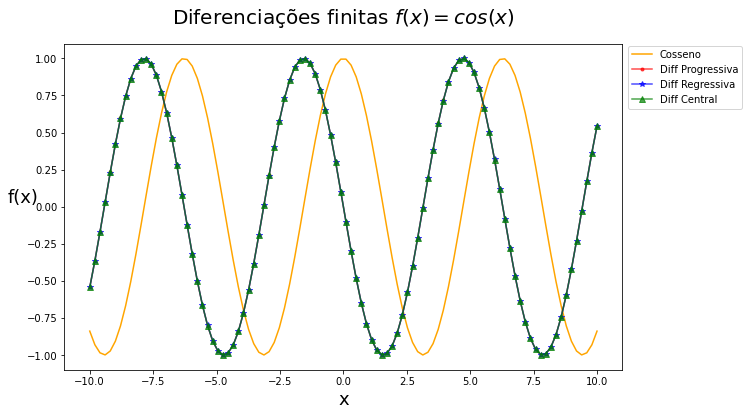

In [18]:
plt.figure(figsize=(10,6))
plt.plot(variaveis_x, cosseno(variaveis_x), label='Cosseno', c='Orange')
plt.plot(variaveis_x, y_progr, label='Diff Progressiva', c='Red', marker='.', alpha=0.7)
plt.plot(variaveis_x, y_regre, label='Diff Regressiva', c='Blue',marker='*',alpha=0.7)
plt.plot(variaveis_x, y_centr, label='Diff Central', c='Green',marker='^', alpha=0.7)
plt.legend(loc=(1.01,0.8))
plt.title(r'Diferenciações finitas $f(x) = cos(x)$', fontsize=20,pad=20)
plt.xlabel(r'x', fontsize=18)
plt.ylabel(r'f(x)', fontsize=18, rotation=0)
plt.show()

## Aplicando diferenciações na função $f(x) = e^x$



In [19]:
y_progr = diff_progressiva(exponencial, variaveis_x)
y_regre = diff_regressiva(exponencial, variaveis_x)
y_centr = diff_central(exponencial, variaveis_x)


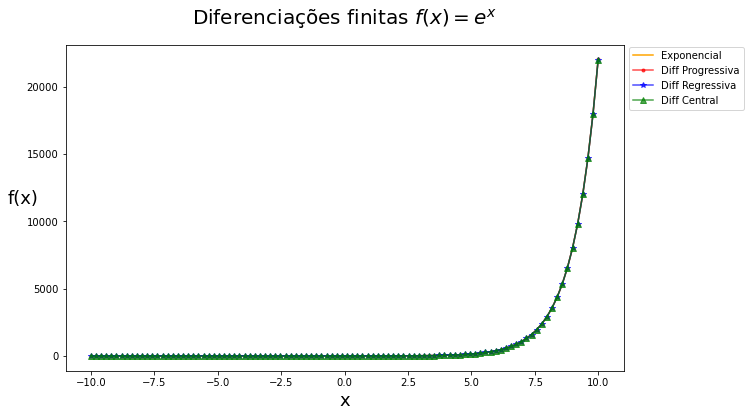

In [20]:
plt.figure(figsize=(10,6))
plt.plot(variaveis_x, exponencial(variaveis_x), label='Exponencial', c='Orange')
plt.plot(variaveis_x, y_progr, label='Diff Progressiva', c='Red', marker='.', alpha=0.7)
plt.plot(variaveis_x, y_regre, label='Diff Regressiva', c='Blue',marker='*',alpha=0.7)
plt.plot(variaveis_x, y_centr, label='Diff Central', c='Green',marker='^', alpha=0.7)
plt.legend(loc=(1.01,0.8))
plt.title(r'Diferenciações finitas $f(x) = e^{x}$', fontsize=20,pad=20)
plt.xlabel(r'x', fontsize=18)
plt.ylabel(r'f(x)', fontsize=18, rotation=0)
plt.show()

## Aplicando diferenciações na função $f(x) = x^{2} + x$



In [22]:
y_progr = diff_progressiva(funcao_segunda_ordem, variaveis_x)
y_regre = diff_regressiva(funcao_segunda_ordem, variaveis_x)
y_centr = diff_central(funcao_segunda_ordem, variaveis_x)

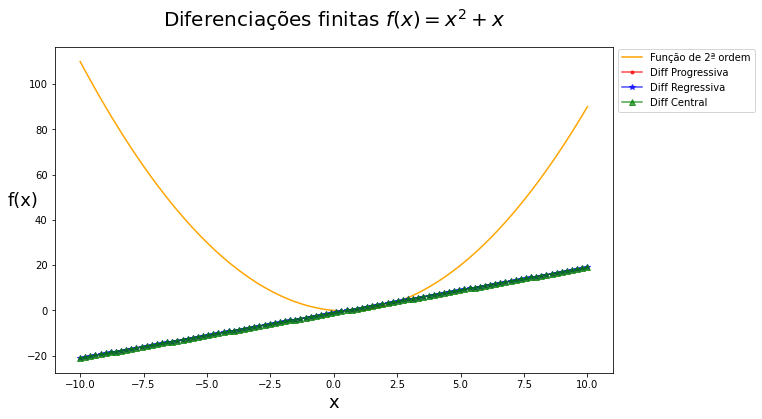

In [23]:
plt.figure(figsize=(10,6))
plt.plot(variaveis_x, funcao_segunda_ordem(variaveis_x), label='Função de 2ª ordem', c='Orange')
plt.plot(variaveis_x, y_progr, label='Diff Progressiva', c='Red', marker='.', alpha=0.7)
plt.plot(variaveis_x, y_regre, label='Diff Regressiva', c='Blue',marker='*',alpha=0.7)
plt.plot(variaveis_x, y_centr, label='Diff Central', c='Green',marker='^', alpha=0.7)
plt.legend(loc=(1.01,0.8))
plt.title(r'Diferenciações finitas $f(x) = x^{2} + x$', fontsize=20,pad=20)
plt.xlabel(r'x', fontsize=18)
plt.ylabel(r'f(x)', fontsize=18, rotation=0)
plt.show()

## Aplicando diferenciações na função $f(x) = ln(x)$



In [24]:
variaveis_x = np.linspace(0.1, 10, 100)  # lembrando que ln só esta definido em R+ 

y_progr = diff_progressiva(log_e, variaveis_x)
y_regre = diff_regressiva(log_e, variaveis_x)
y_centr = diff_central(log_e, variaveis_x)

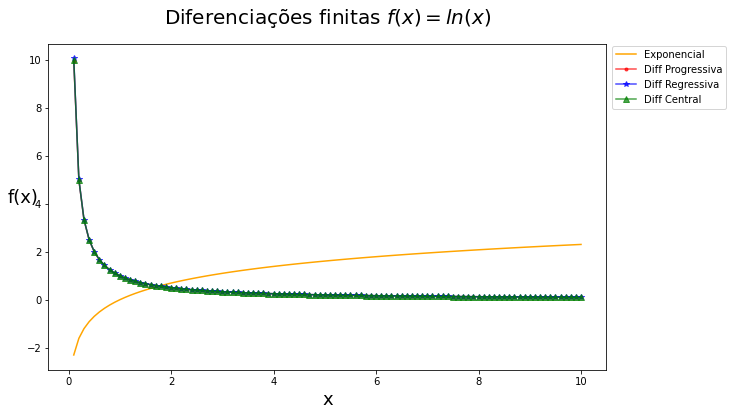

In [25]:
plt.figure(figsize=(10,6))
plt.plot(variaveis_x, log_e(variaveis_x), label='Exponencial', c='Orange')
plt.plot(variaveis_x, y_progr, label='Diff Progressiva', c='Red', marker='.', alpha=0.7)
plt.plot(variaveis_x, y_regre, label='Diff Regressiva', c='Blue',marker='*',alpha=0.7)
plt.plot(variaveis_x, y_centr, label='Diff Central', c='Green',marker='^', alpha=0.7)
plt.legend(loc=(1.01,0.8))
plt.title(r'Diferenciações finitas $f(x) = ln(x)$', fontsize=20,pad=20)
plt.xlabel(r'x', fontsize=18)
plt.ylabel(r'f(x)', fontsize=18, rotation=0)
plt.show()

# Referências
1. Eves, Howard. **Introdução à história da matemática**. São Paulo: Editora UNICAMP, 2004.
2. [**Cálculo Numérico: Um livro colaborativo, versão python**](https://www.ufrgs.br/reamat/CalculoNumerico/livro-py/livro-py.pdf). REAMAT, UFRGS, 2019
3. RUGGIERO, Márcia A. Gomes; LOPES, Vera Lúcia da Rocha. **Cálculo numérico: aspectos teóricos e computacionais**. Makron Books do Brasil, 1997.